# Figure 4

In [1]:
run doomed.py

## **(A)** Total extinction time, **T**

Vary both $u$ and $s$ between $10^{-3}$ and $10^{-1}$.  Set $n_0=100$.

In [2]:
n0 = 100
nsteps = 21
s_range = np.logspace(-3, -1, nsteps)
u_range = np.logspace(-3, -1, nsteps)

In [3]:
def get_matrix(data, n):
    starter = np.zeros((n, n))
    j = 0
    for row in starter:
        z = 0
        for element in row:
            row[z] = data[j][0]
            j += 1
            z += 1
    return starter

def heat_T(n0, s_range, u_range):
    Tresult = []
    Vresult = []
    for s in s_range:
        print round(s, 6),
        for u in u_range:
            t, v = T(n0, s, u, 1e-6, False, True)
            Tresult.append((t, u, s))
            Vresult.append((v, u, s))
    return Tresult, Vresult

In [4]:
Theat, Vheat = heat_T(n0, s_range, u_range)
Tarray = get_matrix(Theat, nsteps)
Varray = get_matrix(Vheat, nsteps)

0.001 0.001259 0.001585 0.001995 0.002512 0.003162 0.003981 0.005012 0.00631 0.007943 0.01 0.012589 0.015849 0.019953 0.025119 0.031623 0.039811 0.050119 0.063096 0.079433 0.1


## **(B)** Extinction time of the mutation-free class, $t_0$

In [5]:
def heat_t0(n0, s_range, u_range):
    result = []
    for s in s_range:
        print round(s, 6),
        for u in u_range:
            result.append((t0(n0, u, 1e-6), u, s))
    return result

In [6]:
t0heat = heat_t0(n0, s_range, u_range)
t0array = get_matrix(t0heat, nsteps)

0.001 0.001259 0.001585 0.001995 0.002512 0.003162 0.003981 0.005012 0.00631 0.007943 0.01 0.012589 0.015849 0.019953 0.025119 0.031623 0.039811 0.050119 0.063096 0.079433 0.1


## **(C)** Size of the least loaded class at the extinction time of the mutation-free class, $x_1$

In [7]:
def heat_x1(n0, s_range, u_range):
    result = []
    for s in s_range:
        print round(s, 6),
        for u in u_range:
            x1, t1, v1 = xtk(100, 1, s, u, 1e-6, False, False)
            result.append((x1, u, s))
    return result

In [8]:
x1heat = heat_x1(n0, s_range, u_range)
x1array = get_matrix(x1heat, nsteps)

0.001 0.001259 0.001585 0.001995 0.002512 0.003162 0.003981 0.005012 0.00631 0.007943 0.01 0.012589 0.015849 0.019953 0.025119 0.031623 0.039811 0.050119 0.063096 0.079433 0.1


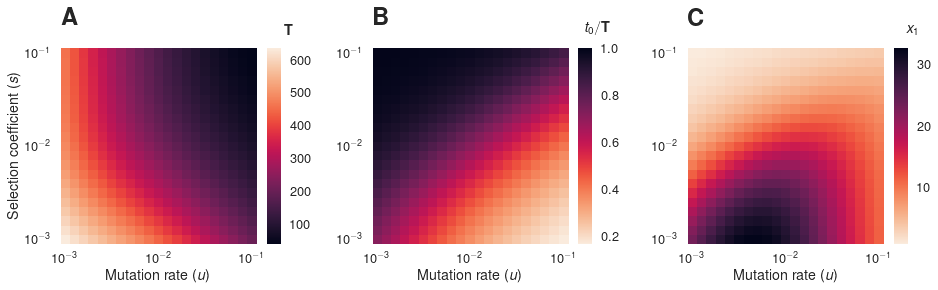

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13, 4))
fig.subplots_adjust()

sns.set()
sns.set_context("talk")

ax1.set_position([-.01, .155, .35, .68])
ax2.set_position([.323, .155, .35, .68])
ax3.set_position([.66, .155, .35, .68])

cbar_ax1 = fig.add_axes([-.01 + .29, .155, .015, .68])
cbar_ax2 = fig.add_axes([.323 + .29, .155, .015, .68])
cbar_ax3 = fig.add_axes([.66 + .29, .155, .015, .68])
    
sns.heatmap(Tarray, square = True, ax=ax1, cbar_ax = cbar_ax1, cmap='rocket', 
    cbar=True)
ax1.set_ylabel(r'Selection coefficient $(s)$')
ax1.text(0, 23.5, r"\textbf{A}", size=24, weight='bold')

sns.heatmap(t0array / Tarray, square = True, ax=ax2, cbar_ax = cbar_ax2, cbar=True, 
    cmap='rocket_r', vmax=1.0, cbar_kws={'ticks': [.2, .4, .6, .8, 1]})
ax2.set_ylabel('')
ax2.text(0, 23.5, r"\textbf{B}", size=24, weight='bold')

sns.heatmap(x1array, square = True, ax=ax3, cbar_ax = cbar_ax3, cbar=True, 
    cmap='rocket_r', cbar_kws={'ticks': [10, 20, 30]})
ax3.set_ylabel('')
ax3.text(0, 23.5, r"\textbf{C}", size=24, weight='bold')

for ax in [ax1, ax2, ax3]:
    ax.invert_yaxis()
    ax.set_xlabel(r'Mutation rate $(u)$')
    ax.set_xticks([0.5, 10.5, 20.5])
    ax.set_xticklabels(['$10^{-3}$', '$10^{-2}$', '$10^{-1}$'], rotation = 0)
    ax.set_yticks([0.5, 10.5, 20.5])
    ax.set_yticklabels(['$10^{-3}$', '$10^{-2}$', '$10^{-1}$'], rotation = 0)

ax1.text(24.38, 22.5, r"$\mathbf{T}$", size=14.5, ha='center')
ax2.text(24.15, 22.5, r"$t_0 / \mathbf{T}$", size=14.5, ha='center')
ax3.text(24.1, 22.5, r"$x_1$", size=14.5, ha='center')

plt.savefig('../figures/fig4.pdf')

# Figure S4

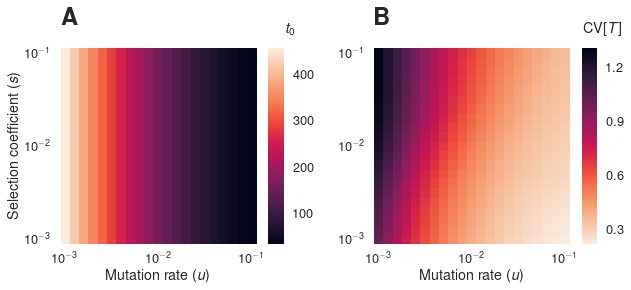

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8.67, 4))
fig.subplots_adjust()

sns.set()
sns.set_context("talk")

ax1.set_position([.049, .16, .4, .68])
ax2.set_position([.551, .16, .4, .68])
cbar_ax1 = fig.add_axes([.049 + 0.375, .16, .025, .68])
cbar_ax2 = fig.add_axes([.551 + 0.375, .16, .025, .68])

sns.heatmap(t0array, square = True, ax=ax1, cbar_ax = cbar_ax1, cmap='rocket', 
    cbar=True, cbar_kws={'ticks': [100, 200, 300, 400]})
ax1.set_ylabel(r'Selection coefficient $(s)$')
ax1.text(0, 23.5, r"\textbf{A}", size=24, weight='bold')

sns.heatmap(np.sqrt(Varray) / Tarray, square = True, ax=ax2, cbar_ax = cbar_ax2, cbar=True, 
    cmap='rocket_r', cbar_kws={'ticks': [.3, .6, .9, 1.2]})
ax2.set_ylabel('')
ax2.text(0, 23.5, r"\textbf{B}", size=24, weight='bold')

for ax in [ax1, ax2]:
    ax.invert_yaxis()
    ax.set_xlabel(r'Mutation rate $(u)$')
    ax.set_xticks([0.5, 10.5, 20.5])
    ax.set_xticklabels(['$10^{-3}$', '$10^{-2}$', '$10^{-1}$'], rotation = 0)
    ax.set_yticks([0.5, 10.5, 20.5])
    ax.set_yticklabels(['$10^{-3}$', '$10^{-2}$', '$10^{-1}$'], rotation = 0)

ax1.text(24.65, 22.5, r"$t_0$", size=14.5, ha='center')
ax2.text(24.5, 22.5, r"CV$[T]$", size=14.5, ha='center')

plt.savefig('../figures/figS4.pdf')